In [1]:
%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux 
%cd test
!rm -rf *.jpg
!rm -rf unknown
!rm -rf sample


%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux 
%cd train
!rm -rf cats
!rm -rf dogs
!rm -rf *.jpg


%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux 
!rm -rf valid
!rm -rf results
!rm -rf sample/train/
!rm -rf sample/valid/
!rm -rf sample/

%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux 
!rmdir test
!rmdir train

%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
!unzip -q test.zip
!unzip -q train.zip

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/test
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/train
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux


In [2]:
%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1
%pwd

/home/ubuntu/courses/deeplearning1/nbs/lesson1


u'/home/ubuntu/courses/deeplearning1/nbs/lesson1'

In [3]:
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data/redux'

In [4]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from utils import *
from vgg16 import Vgg16

%matplotlib inline

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


## Action Plan
1. Create Validation and Sample sets
2. Rearrange image files into their respective directories
3. Finetune and Train model
4. Generate predictions
5. Validation predictions
6. Submit predictions to Kaggle

## Create validation set and sample

In [5]:
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
!tree -d

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
.
├── results
├── test
├── train
└── valid

4 directories


In [6]:
#Store the folder structure in txt file
!find . -type d > dirs.txt
%cat dirs.txt

.
./valid
./train
./results
./test


In [7]:
!rm -rf sample
#create sample folder
%mkdir sample
%cd sample
! cat ../dirs.txt

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/sample
.
./valid
./train
./results
./test


In [8]:
#create the same folder structure inside /sample
!xargs mkdir -p < ../dirs.txt

In [9]:
%cd $DATA_HOME_DIR
!tree -d

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
.
├── results
├── sample
│   ├── results
│   ├── test
│   ├── train
│   └── valid
├── test
├── train
└── valid

9 directories


In [10]:
%cd $DATA_HOME_DIR

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux


In [10]:
def getFileNameFromPath(path):
    return os.path.basename(path)

In [12]:
# Move 2000 random jpg files from /train to /valid
g = glob('train/*.jpg')
shuf = np.random.permutation(g)
for i in range(2000) : os.rename(shuf[i], DATA_HOME_DIR + '/valid/' + getFileNameFromPath(shuf[i]) )

In [13]:
!echo ----Valid----
%ls valid | head -5 && ls valid  | tail -5 && ls valid  | wc -l
%ls train | wc -l
# 2000 random files moved from /train to /valid
# /valid has 2000 files
# Now /train has 25000 - 2000 = 23000

----Valid----
cat.10008.jpg
cat.1000.jpg
cat.10045.jpg
cat.10048.jpg
cat.10054.jpg
ls: write error
dog.996.jpg
dog.9974.jpg
dog.9978.jpg
dog.9991.jpg
dog.9995.jpg
2000
23000


In [14]:
from shutil import copyfile

In [15]:
# Copy 200 random jpg files from /train to /sample/train
g = glob('train/*.jpg')
shuf = np.random.permutation(g)
for i in range(200) : copyfile(shuf[i], DATA_HOME_DIR + '/sample/train/' + getFileNameFromPath(shuf[i]))

In [16]:
# Copied 200 files from /train to /sample/train
%ls sample/train/ | head -5 && ls sample/train/ | tail -5 && ls sample/train/| wc -l
%ls train| wc -l
# /sample/train has 200 files
# /train has 23000 files

cat.1029.jpg
cat.10383.jpg
cat.10391.jpg
cat.10896.jpg
cat.11050.jpg
dog.9344.jpg
dog.9548.jpg
dog.9853.jpg
dog.9903.jpg
dog.9924.jpg
200
23000


In [20]:
%cd $DATA_HOME_DIR

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux


In [21]:
g = glob('valid/*.jpg')
shuf = np.random.permutation(g)
for i in range(50) : copyfile(shuf[i], DATA_HOME_DIR + '/sample/valid/' + getFileNameFromPath(shuf[i]))

In [22]:
# Copied 50 random files from /valid to /sample/valid
# /valid still has 2000 files, /sample/valid has 50
%ls valid | wc -l
%ls sample/valid/ | wc -l

2000
50


## Rearrange files into their respective directories

In [23]:
#Divide cat/dog images into separate directories

%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/sample/train


In [24]:
%ls cats | wc -l
%ls dogs | wc -l

91
109


In [25]:
%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/sample/valid


In [26]:
%ls cats | wc -l
%ls dogs | wc -l

25
25


In [27]:
%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/valid


In [28]:
%ls cats | wc -l
%ls dogs | wc -l

973
1027


In [29]:
%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/train


In [30]:
%ls cats | wc -l
%ls dogs | wc -l

11527
11473


In [31]:
#Create single unknown class for test set
%mkdir -p $DATA_HOME_DIR/test/unknown
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/test


In [32]:
%ls $DATA_HOME_DIR/test/unknown | wc -l
%ls $DATA_HOME_DIR/test/unknown | head

12500
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
ls: write error


In [33]:
%pwd

u'/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/test'

## Finetuning and Training

In [54]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR #+ '/sample'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path = DATA_HOME_DIR + '/results/'
train_path = path + '/train/'
valid_path = path + '/valid'

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux


In [55]:
print path
print test_path
print results_path
print train_path
print valid_path

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/test/
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/results/
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/train/
/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/valid


In [63]:
vgg = Vgg16()

In [64]:
#You can experiment with no_of_epochs to improve the model
batch_size = 64
no_of_epochs=4

In [65]:
#Finetune the model
batches = vgg.get_batches(train_path, batch_size=batch_size)
# val_batches is twice the number of batches because it doesn't need backprop, so needs less memory.
val_batches = vgg.get_batches(valid_path, batch_size=batch_size * 2)
vgg.finetune(batches)


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [66]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print "Running epoch %d" % epoch
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path + latest_weights_filename)
print "Completed %s fit operations" % no_of_epochs

Running epoch 0
Epoch 1/1
23000/23000 [==============================] - 648s - loss: 0.1232 - acc: 0.9678 - val_loss: 0.0520 - val_acc: 0.9815
Running epoch 1
Epoch 1/1
23000/23000 [==============================] - 649s - loss: 0.0979 - acc: 0.9763 - val_loss: 0.0784 - val_acc: 0.9830
Running epoch 2
Epoch 1/1
23000/23000 [==============================] - 649s - loss: 0.0913 - acc: 0.9773 - val_loss: 0.0720 - val_acc: 0.9840
Running epoch 3
Epoch 1/1
23000/23000 [==============================] - 649s - loss: 0.0937 - acc: 0.9794 - val_loss: 0.0820 - val_acc: 0.9835
Completed 4 fit operations


## Generate Predictions
### Let's use our new model to make predictions on the test dataset

In [99]:
#Third epoc resulted in the highest val_acc: 0.9840, so loading those weights

vgg.model.load_weights(results_path + "ft2.h5")

In [100]:
batches, preds = vgg.test(test_path, batch_size = batch_size * 2)

Found 12500 images belonging to 1 classes.


In [101]:
# For every image, vgg.test() generates two probabilities
# based on how we've ordered the cats/dogs directories.
# It looks like column one is cats and column 2 is dogs
print preds[:5]

filenames = batches.filenames
print filenames[:5]

[[  1.0000e+00   5.8597e-11]
 [  5.4242e-04   9.9946e-01]
 [  1.0000e+00   5.1130e-07]
 [  1.0000e+00   1.4650e-13]
 [  3.4783e-10   1.0000e+00]]
['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']


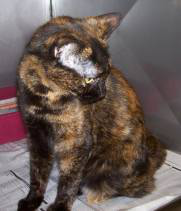

In [102]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [103]:
results_path

'/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/results/'

In [104]:
# Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

In [105]:
results_path + 'test_preds.dat'

'/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/results/test_preds.dat'

## Validate predictions
Keras' fit() function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("epoch" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting.

* Tip: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:

1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

Let's see what we can learn from these examples. (In general, this is a particularly useful technique for debugging problems in the model. However, since this model is so simple, there may not be too much to learn at this stage.)

Calculate predictions on validation set, so we can find correct and incorrect examples:


In [ ]:
#latest_weights_filename = "ft2.h5"
vgg.model.load_weights(results_path+latest_weights_filename)

In [ ]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

In [ ]:
val_batches.next()

In [ ]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)


In [ ]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + '/' + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

In [ ]:
valid_path

In [ ]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print "Found %d correct labels" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

In [ ]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print "Found %d incorrect labels" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

In [ ]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print "Found %d confident correct cats labels" % len(correct_cats)
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

In [ ]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print "Found %d confident correct dogs labels" % len(correct_dogs)
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])


In [ ]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])



In [ ]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print "Found %d incorrect dogs" % len(incorrect_dogs)
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])



In [ ]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])



Perhaps the most common way to analyze the result of a classification model is to use a confusion matrix. Scikit-learn has a convenient function we can use for this purpose:

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

In [ ]:
plot_confusion_matrix(cm, val_batches.class_indices)

### Submit predictions to Kaggle


Here's the format Kaggle requires for new submissions:

imageId,isDog
1242, .3984
3947, .1000
4539, .9082
2345, .0000

Kaggle wants the imageId followed by the probability of the image being a dog. Kaggle uses a metric called Log Loss to evaluate your submission.

In [106]:
#Load our test predictions from file
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [107]:
#Grab the dog prediction column
isdog = preds[:,1]

isdog_clipped = np.clip([isdog], 0.0275, 0.975)
# print "Raw Predictions: " + str(isdog[:5])
# print "Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)])
# print "Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)])

In [108]:
from os.path import basename
ids = [int(getFileNameFromPath(os.path.splitext(x)[0])) for x in filenames]
# ids

In [109]:
my_submission = np.stack([ids, isdog], axis = 1)

In [110]:
 my_submission

array([[  9.2920e+03,   5.8597e-11],
       [  1.2026e+04,   9.9946e-01],
       [  9.6880e+03,   5.1130e-07],
       ..., 
       [  1.1708e+04,   3.1746e-11],
       [  5.2500e+02,   5.3206e-15],
       [  6.3750e+03,   1.0000e+00]])

In [114]:
%cd /home/ubuntu/courses/deeplearning1/nbs/lesson1

np.savetxt('data/redux/my_submission_fulldata_4th_epoch_clip_0275.csv', my_submission, fmt='%d,%.5f', header='id,label', comments='')

/home/ubuntu/courses/deeplearning1/nbs/lesson1


In [115]:
from IPython.display import FileLink
FileLink('data/redux/my_submission_fulldata_4th_epoch_clip_0275.csv')

/home/ubuntu/courses/deeplearning1/nbs/lesson1/data/redux/my_submission_fulldata_4th_epoch_clip_0275.csv